In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(clinical_data, mouse_data, how='inner', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin


In [3]:
mouse_data.head(3)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn


In [4]:
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_vol_mean = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
tumor_vol_summary_mean = pd.DataFrame({"Tumor Volume (mm3)": tumor_vol_mean})

tumor_vol_summary_mean.reset_index(inplace = True)


In [6]:
tumor_vol_summary_mean.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [80]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_vol_summary_sem = pd.DataFrame({"Tumor Volume (mm3)": tumor_vol_sem})

# Preview DataFrame

tumor_vol_summary_sem.reset_index(inplace = True)
tumor_vol_summary_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [79]:
# Minor Data Munging to Re-Format the Data Frames

tumor_vol_summary_pivot =tumor_vol_summary_mean.pivot(index = 'Timepoint', columns = 'Drug', values ='Tumor Volume (mm3)' )
      
tumor_vol_summary_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


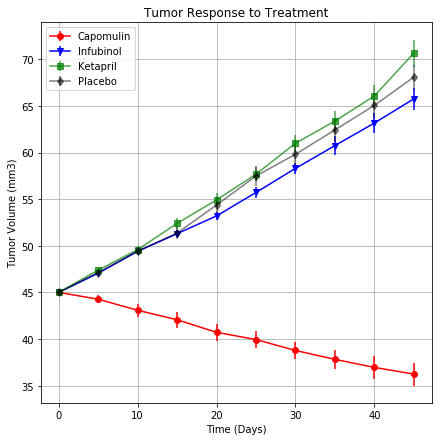

In [72]:
# Generate the Plot (with Error Bars)

figure, ax = plt.subplots(figsize=(7,7))

y1_axis = tumor_vol_summary_pivot.Capomulin.values   #Capomulin
y2_axis = tumor_vol_summary_pivot.Infubinol.values     #Infubin
y3_axis = tumor_vol_summary_pivot.Ketapril.values    #Ketapril
y4_axis = tumor_vol_summary_pivot.Placebo.values     #Placebo
x_axis = tumor_vol_summary_pivot.index.values       #Index

standard_error = tumor_vol_summary_sem[tumor_vol_summary_sem.Drug == "Capomulin"]["Tumor Volume (mm3)"].values
ax.errorbar(x_axis, y1_axis, standard_error, marker="o", color='red', label="Capomulin", linestyle="solid")

standard_error = tumor_vol_summary_sem[tumor_vol_summary_sem.Drug == "Infubinol"]["Tumor Volume (mm3)"].values
ax.errorbar(x_axis, y2_axis, standard_error, marker="v",color='blue', label='Infubinol')

standard_error = tumor_vol_summary_sem[tumor_vol_summary_sem.Drug == "Ketapril"]["Tumor Volume (mm3)"].values
ax.errorbar(x_axis, y3_axis, standard_error, marker="s", color='green', label='Ketapril', alpha=0.7)

standard_error = tumor_vol_summary_sem[tumor_vol_summary_sem.Drug == "Placebo"]["Tumor Volume (mm3)"].values
ax.errorbar(x_axis, y4_axis, standard_error,marker="d", color='black', label='Placebo', alpha=0.5)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left") 
plt.grid()

plt.savefig("Plots/Pyber_ridesharing_data.png")


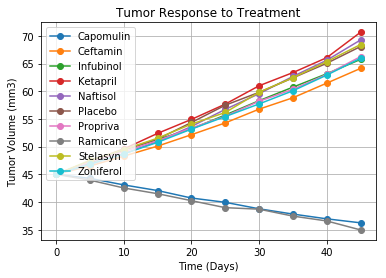

In [76]:
# Show the Figure

#df.plot(style=['+-','o-','.--','s:'])   lines and points formating
#--------------working graph -------------------------------------------------------------------------
#figure, ax = plt.subplots(figsize=(8,8))

tumor_vol_summary_pivot.plot.line(marker="o", title=("Tumor Response to Treatment"),grid=True)
# plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left") 
# plt.grid()
#-------------end of working graph ------------------------------------------------------------------


## Metastatic Response to Treatment

In [78]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_met_mean = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
tumor_met_mean_summary = pd.DataFrame({"Metastatic Sites": tumor_met_mean})
tumor_met_mean_summary.reset_index(inplace = True)

# Preview DataFrame
tumor_met_mean_summary.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [84]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

tumor_met_sem = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()


# Convert to DataFrame
tumor_met_sem_summary = pd.DataFrame(tumor_met_sem)
tumor_met_sem_summary.reset_index(inplace = True)

# Preview DataFrame
tumor_met_sem_summary.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()